In [1]:
#Import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Inline matplotlib to view inside this notebook directly
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
df = pd.read_csv("C:/Users/dell/Documents/SID/semester 4/ML Project/Dataset/heart.csv")


In [3]:
df.shape

(1025, 14)

In [4]:
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#Checking for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
# Outlier Detection

df_numeric = df[['age','trestbps','chol','thalach','oldpeak']]
df_numeric.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [11]:
# Outlier Removal
z = np.abs(stats.zscore(df_numeric))
threshold=3
df = df[(z < 3).all(axis=1)]
df.shape

(994, 14)

In [12]:
# Normalization
scaler = MinMaxScaler()
df[['age','trestbps','chol','thalach','oldpeak']] = scaler.fit_transform(df[['age','trestbps','chol','thalach','oldpeak']])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.360465,0.320896,0,1,0.701754,0,0.227273,2,2,3,0
1,0.500000,1,0,0.534884,0.287313,1,0,0.587719,1,0.704545,0,0,3,0
2,0.854167,1,0,0.593023,0.179104,0,1,0.324561,1,0.590909,0,0,3,0
3,0.666667,1,0,0.627907,0.287313,0,1,0.640351,0,0.000000,2,1,3,0
4,0.687500,0,0,0.511628,0.626866,1,1,0.157895,0,0.431818,1,3,2,0


In [13]:
#EXPLORATORY DATA ANALYSIS


In [14]:
#how many class of one feature or target
df["target"].value_counts()

target
1    520
0    474
Name: count, dtype: int64

<Axes: xlabel='target'>

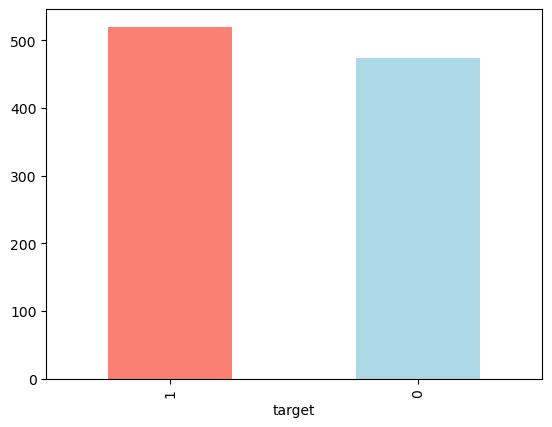

In [15]:
#bar chart
df["target"].value_counts().plot(kind='bar', color=["salmon","lightblue"])

In [16]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [17]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [18]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [19]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

In [20]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=df, ax=axes[ax_index][1])

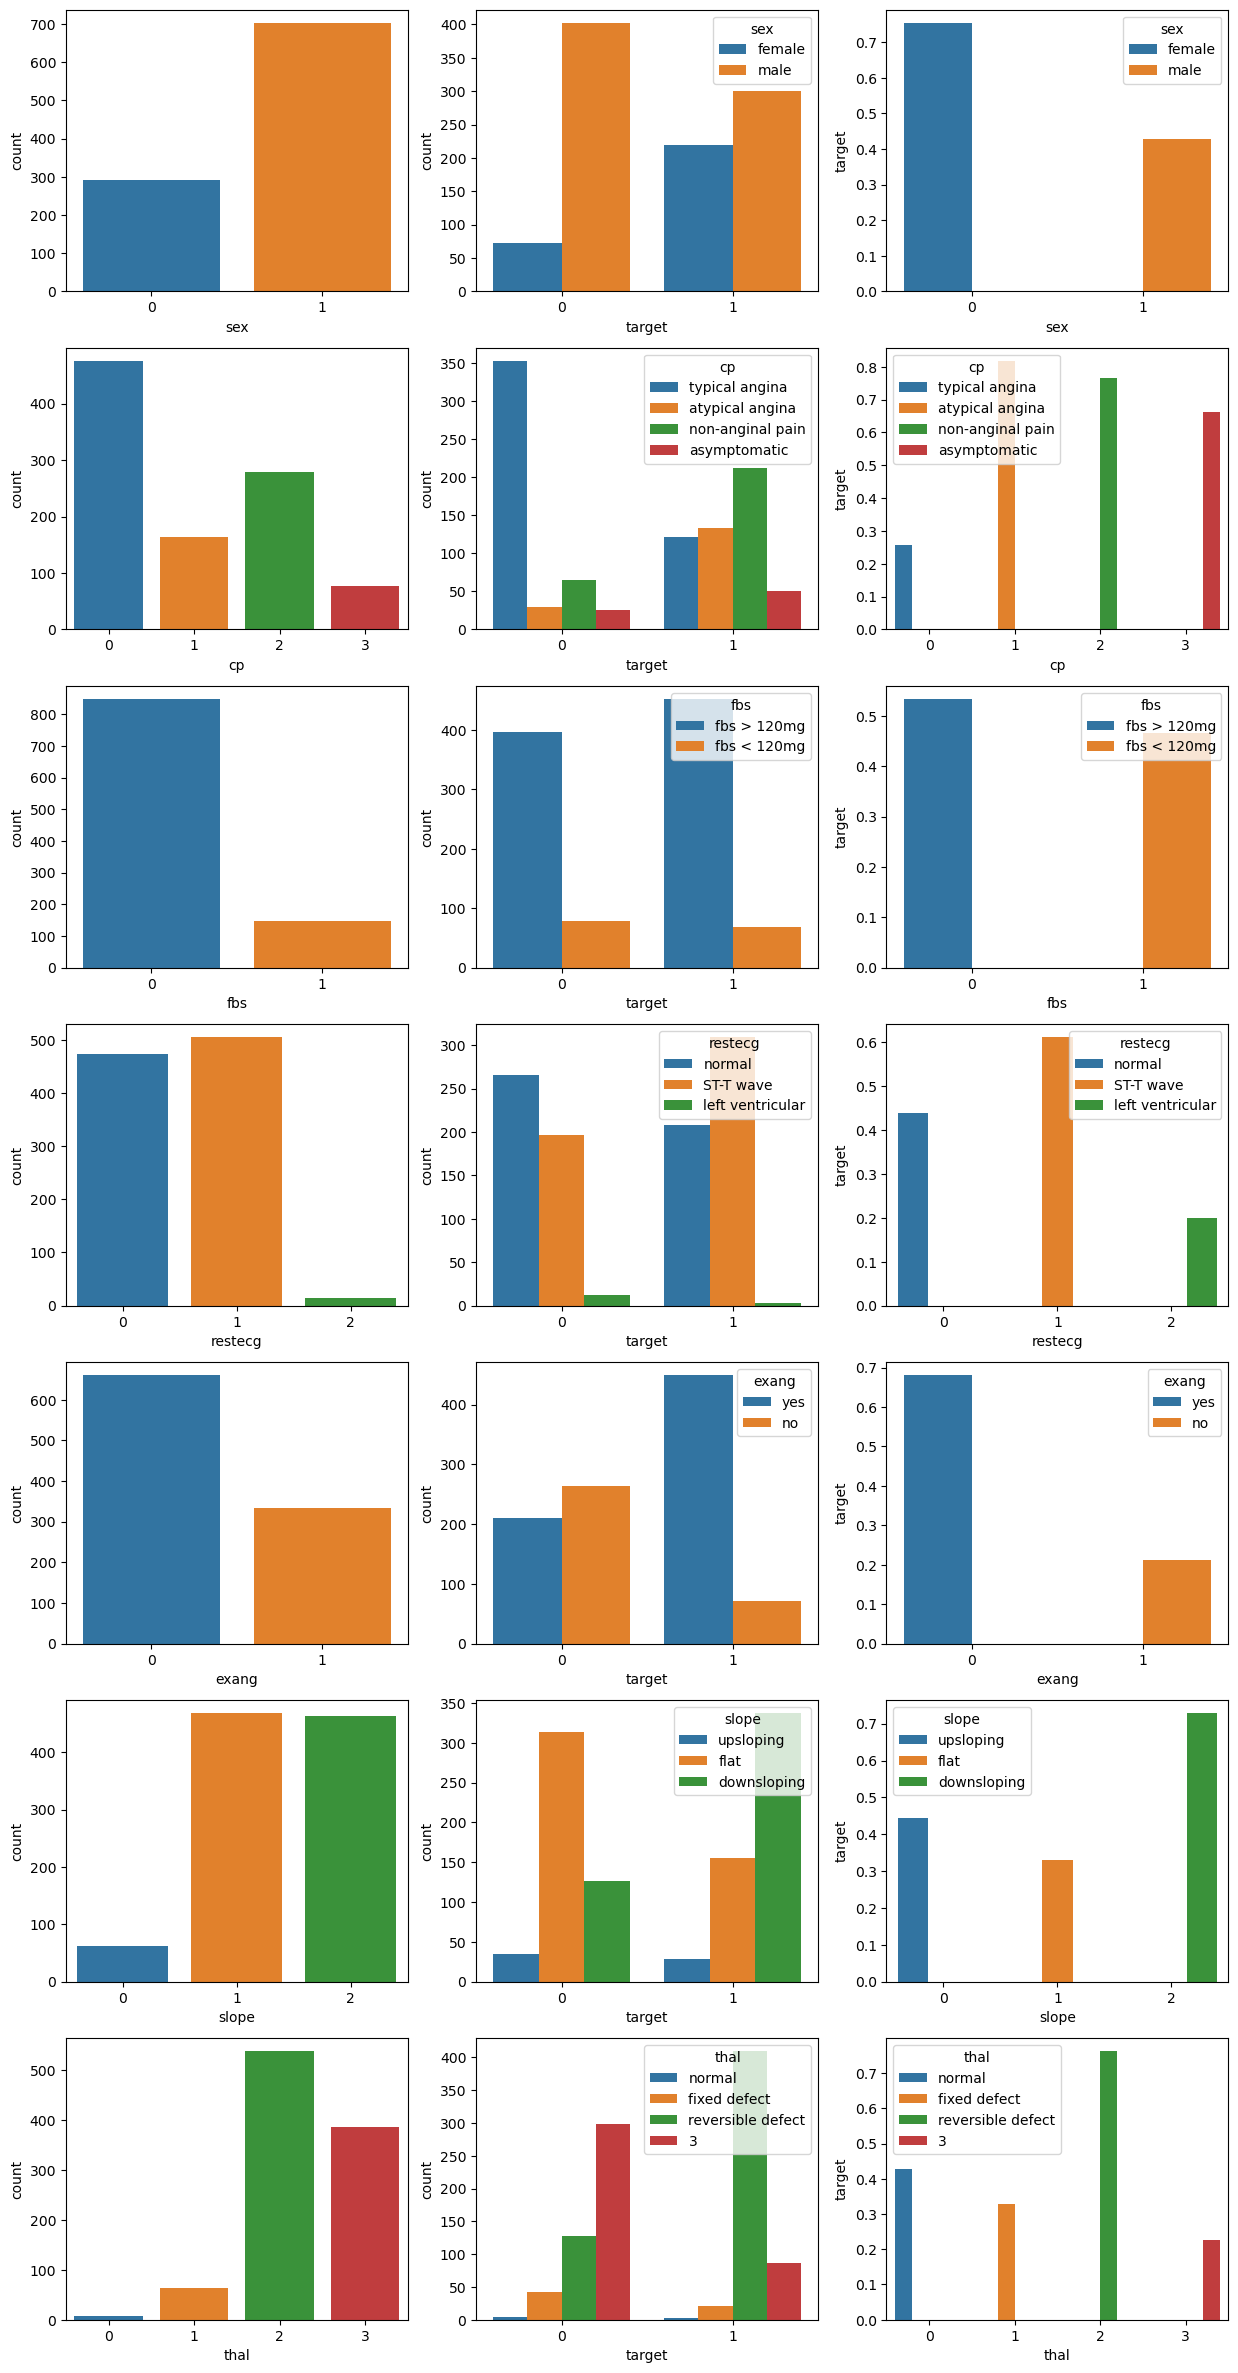

In [21]:
#Visualizing categorical data throgh countplots and barplots
continufig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_8480\2731686314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[[attribute]], ax=axes[ax_index][0])
C:\Users\dell\AppData\Local\Temp\ipykernel_8480\2731686314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[[attribute]], ax=axes[ax_index][

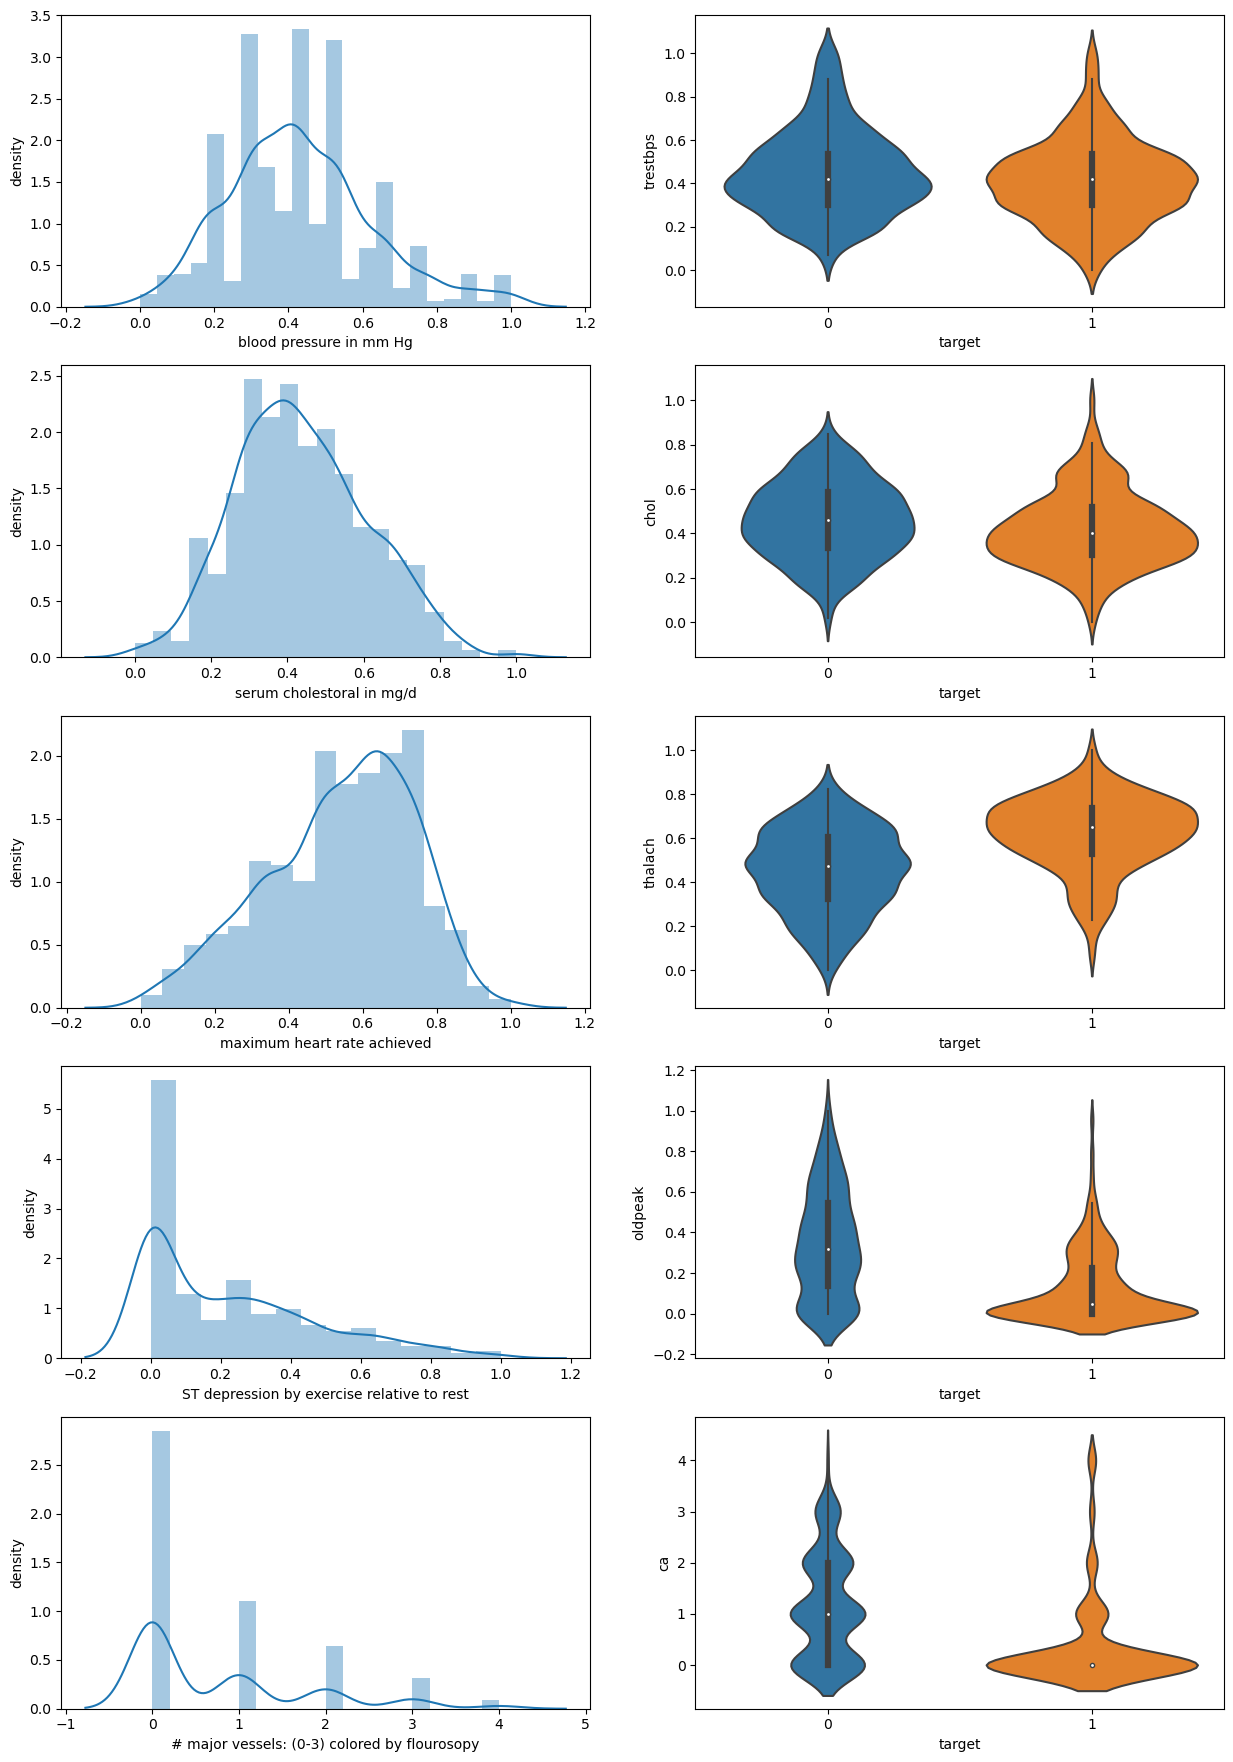

In [22]:
#Visulaizing numerical data through distplots and violin plots
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)


(14.5, -0.5)

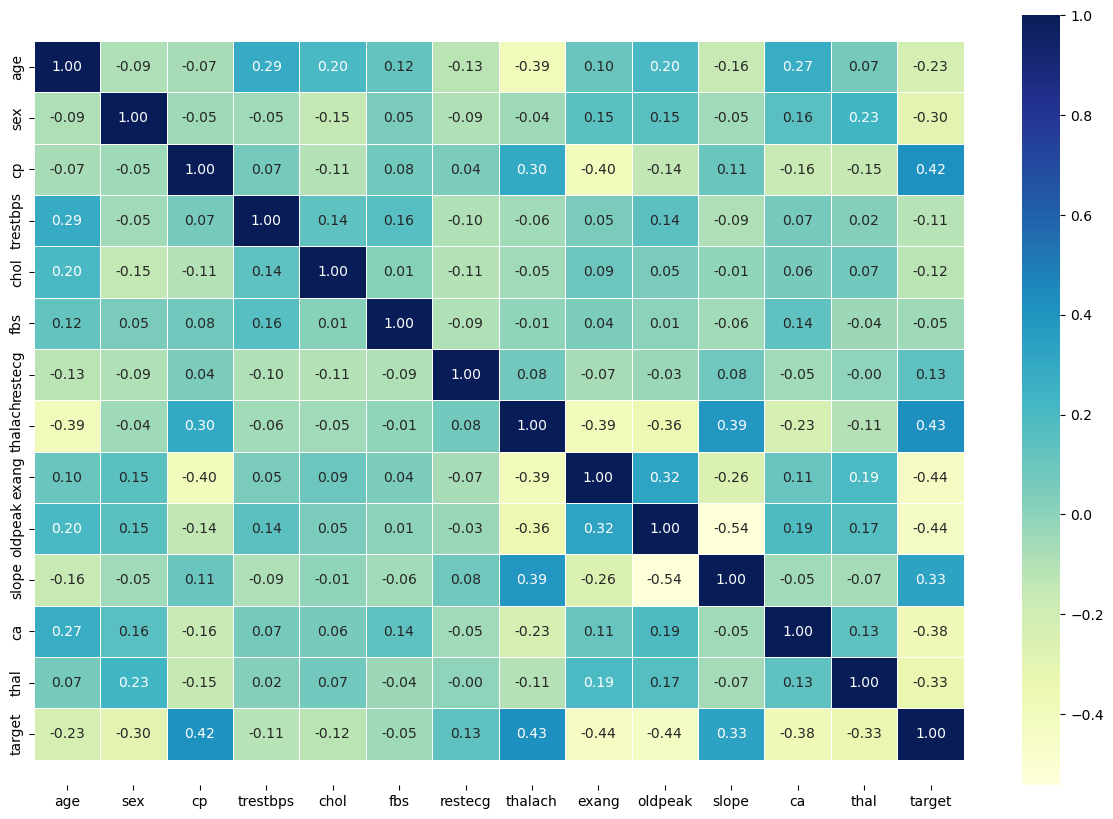

In [23]:
#Visualise Correlation Coefficients

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [24]:
df.to_csv('C:/Users/dell/Documents/SID/semester 4/ML Project/Dataset/heart_preprocessed.csv', index=False) 

In [25]:
data=pd.read_csv("C:/Users/dell/Documents/SID/semester 4/ML Project/Dataset/heart_preprocessed.csv")

In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.360465,0.320896,0,1,0.701754,0,0.227273,2,2,3,0
1,0.500000,1,0,0.534884,0.287313,1,0,0.587719,1,0.704545,0,0,3,0
2,0.854167,1,0,0.593023,0.179104,0,1,0.324561,1,0.590909,0,0,3,0
3,0.666667,1,0,0.627907,0.287313,0,1,0.640351,0,0.000000,2,1,3,0
4,0.687500,0,0,0.511628,0.626866,1,1,0.157895,0,0.431818,1,3,2,0


In [27]:
#Splitting data into training and test sets

In [28]:
X=df.drop("target",axis=1)
Y=df["target"]

In [29]:
np.random.seed(40)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [30]:
# Model Development

In [31]:
#Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    Y_train : training labels
    Y_test : test labels
    """
    #set random seed
    np.random.seed(33)
    #dictionary to keep model scores
    model_scores = {}
    #loop thru models
    for name, model in models.items():
        #fit model
        model.fit(X_train, Y_train)
        #evaluate model and append score
        model_scores[name]=model.score(X_test, Y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
model_scores

{'Logistic Regression': 0.8542713567839196,
 'KNN': 0.8442211055276382,
 'Random Forest': 1.0}

In [33]:
# Hyperparameter tuning

In [34]:
#Tune knn
train_scores = []
test_scores = []

#list for different values of n-neighbors
neighbors = range(1,21)

#set up knn instance
knn = KNeighborsClassifier()

#loop thru list
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(X_train, Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))

In [35]:
test_scores

[0.9849246231155779,
 0.9547738693467337,
 0.9296482412060302,
 0.8793969849246231,
 0.8442211055276382,
 0.8693467336683417,
 0.8391959798994975,
 0.8391959798994975,
 0.8542713567839196,
 0.8492462311557789,
 0.8391959798994975,
 0.8190954773869347,
 0.8241206030150754,
 0.8241206030150754,
 0.8442211055276382,
 0.8040201005025126,
 0.8341708542713567,
 0.8241206030150754,
 0.8291457286432161,
 0.8190954773869347]

Maximum KNN score on the test data: 98.49%


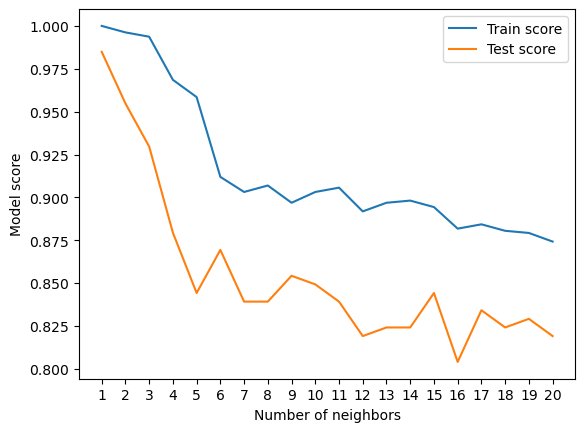

In [36]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [37]:
# Tuning LR

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)


gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [39]:
gs_lr_score = gs_log_reg.score(X_test,Y_test)
gs_lr_score

0.8542713567839196

In [40]:
#tuning RF
#Create a hyperparameter grid for RF
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [41]:
#Set random parameter search for RF
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameter search model for RF
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [43]:
rs_rf_score =rs_rf.score(X_test, Y_test)
rs_rf_score

0.9597989949748744

In [44]:
# Performance Measurement

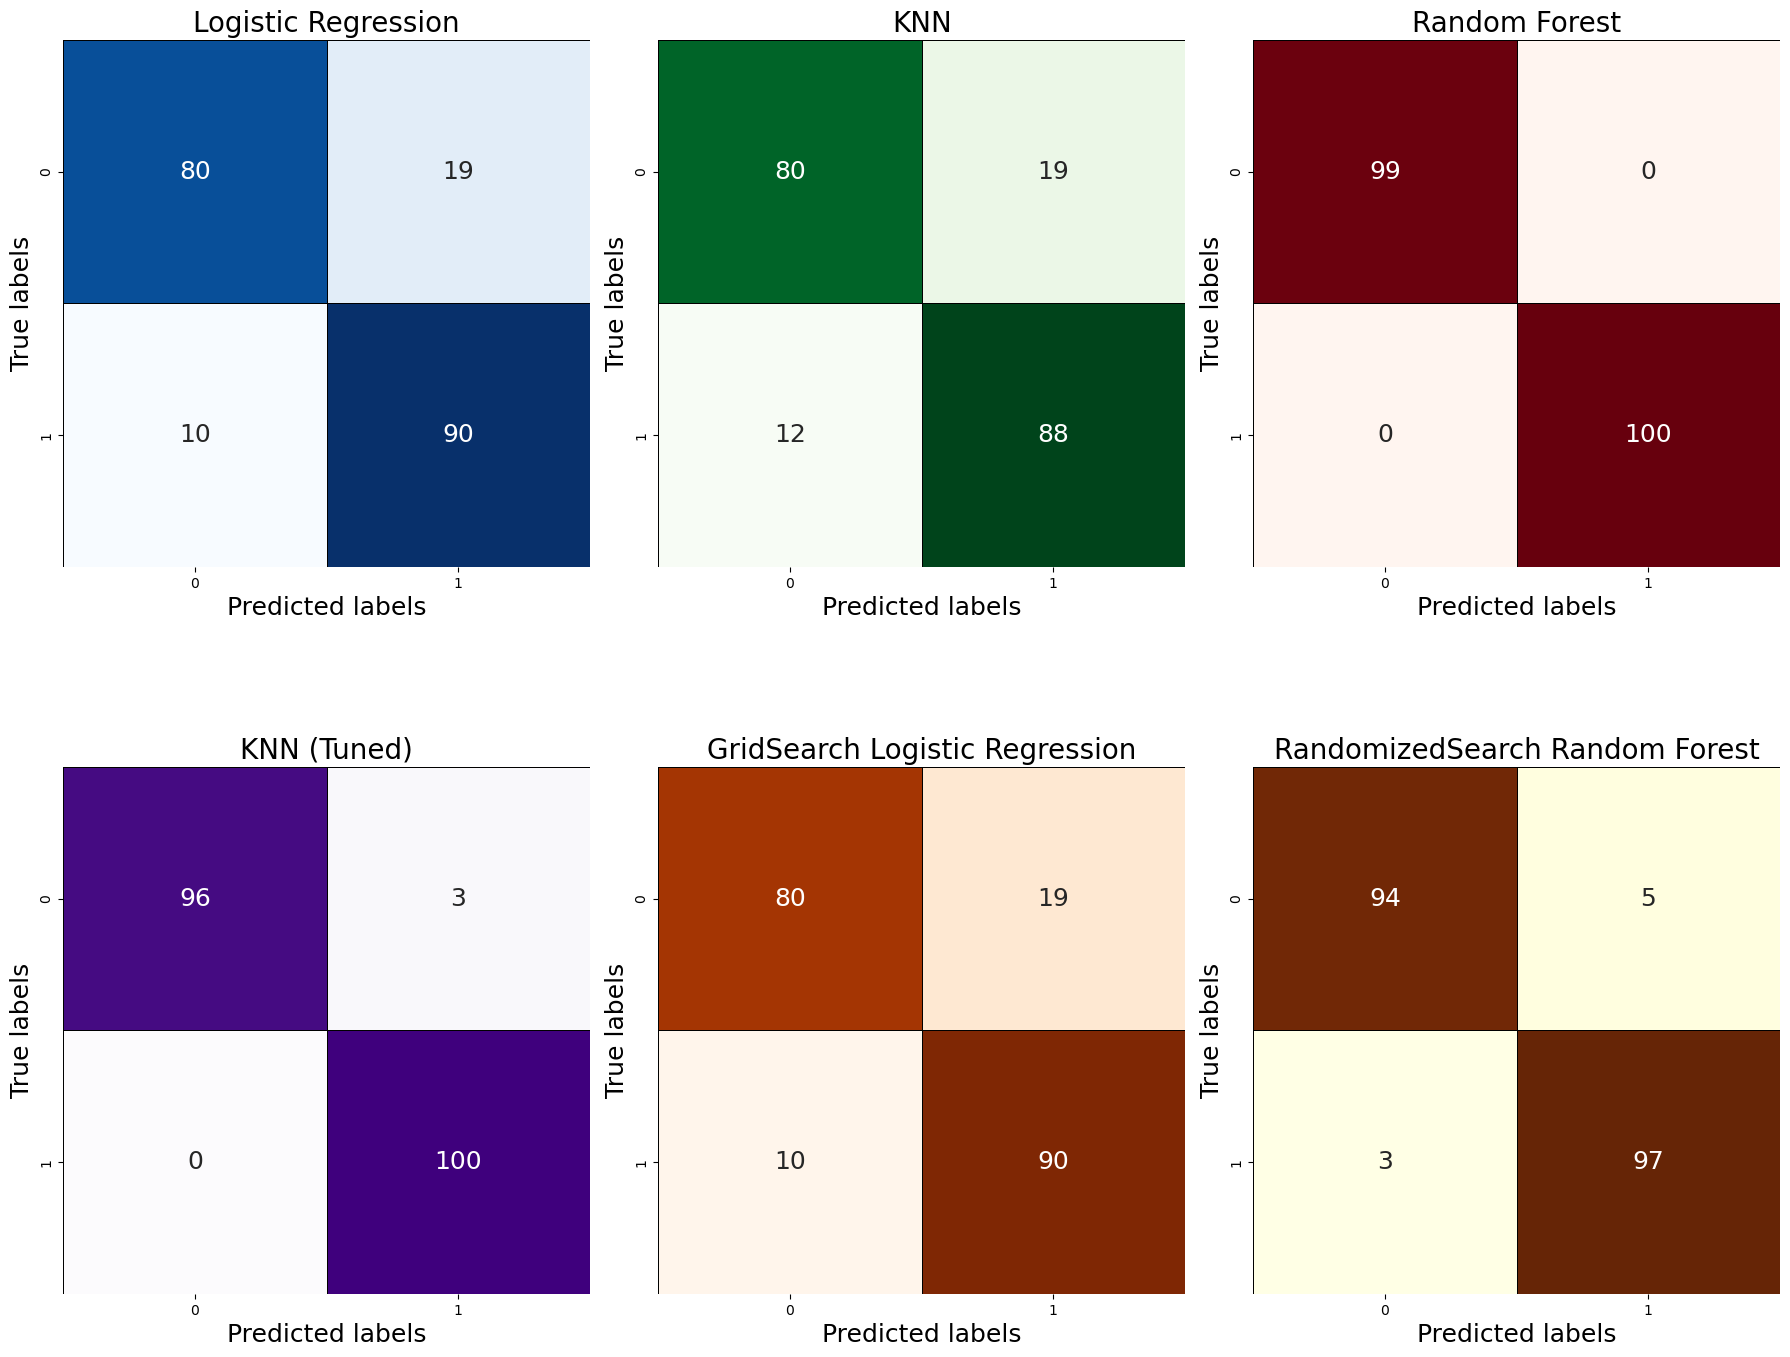

In [45]:
# Make predictions using the given models
y_pred1 = models['Logistic Regression'].predict(X_test)
y_pred2 = models['KNN'].predict(X_test)
y_pred3 = models['Random Forest'].predict(X_test)
knn.set_params(n_neighbors=1)
knn.fit(X_train, Y_train)
y_pred4 = knn.predict(X_test)
y_pred5 = gs_log_reg.predict(X_test)
y_pred6 = rs_rf.predict(X_test)

# Compute confusion matrices
cm1 = confusion_matrix(Y_test, y_pred1)
cm2 = confusion_matrix(Y_test, y_pred2)
cm3 = confusion_matrix(Y_test, y_pred3)
cm4 = confusion_matrix(Y_test, y_pred4)
cm5 = confusion_matrix(Y_test, y_pred5)
cm6 = confusion_matrix(Y_test, y_pred6)

# Plotting confusion matrices using heatmaps
plt.figure(figsize=(18, 15))

plt.subplot(2, 3, 1)
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 18}, cbar=False, square=True, linewidths=.5, linecolor='black', robust=True)
plt.title('Logistic Regression', fontsize=20)
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.gca().set_aspect('equal')  # Set aspect ratio

plt.subplot(2, 3, 2)
sns.heatmap(cm2, annot=True, fmt='g', cmap='Greens', annot_kws={"size": 18}, cbar=False, square=True, linewidths=.5, linecolor='black', robust=True)
plt.title('KNN', fontsize=20)
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.gca().set_aspect('equal')  # Set aspect ratio

plt.subplot(2, 3, 3)
sns.heatmap(cm3, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 18}, cbar=False, square=True, linewidths=.5, linecolor='black', robust=True)
plt.title('Random Forest', fontsize=20)
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.gca().set_aspect('equal')  # Set aspect ratio

plt.subplot(2, 3, 4)
sns.heatmap(cm4, annot=True, fmt='g', cmap='Purples', annot_kws={"size": 18}, cbar=False, square=True, linewidths=.5, linecolor='black', robust=True)
plt.title('KNN (Tuned)', fontsize=20)
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.gca().set_aspect('equal')  # Set aspect ratio

plt.subplot(2, 3, 5)
sns.heatmap(cm5, annot=True, fmt='g', cmap='Oranges', annot_kws={"size": 18}, cbar=False, square=True, linewidths=.5, linecolor='black', robust=True)
plt.title('GridSearch Logistic Regression', fontsize=20)
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.gca().set_aspect('equal')  # Set aspect ratio

plt.subplot(2, 3, 6)
sns.heatmap(cm6, annot=True, fmt='g', cmap='YlOrBr', annot_kws={"size": 18}, cbar=False, square=True, linewidths=.5, linecolor='black', robust=True)
plt.title('RandomizedSearch Random Forest', fontsize=20)
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.gca().set_aspect('equal')  # Set aspect ratio

plt.tight_layout()
plt.show()



In [46]:
# Print classification reports
print("Classification Report for Logistic Regression:")
print(classification_report(Y_test, y_pred1))

print("\nClassification Report for KNN:")
print(classification_report(Y_test, y_pred2))

print("\nClassification Report for Random Forest:")
print(classification_report(Y_test, y_pred3))

print("\nClassification Report for KNN (tuned):")
print(classification_report(Y_test, y_pred4))

print("\nClassification Report for GridSearch Logistic Regression:")
print(classification_report(Y_test, y_pred5))

print("\nClassification Report for RandomizedSearch Random Forest:")
print(classification_report(Y_test, y_pred6))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        99
           1       0.83      0.90      0.86       100

    accuracy                           0.85       199
   macro avg       0.86      0.85      0.85       199
weighted avg       0.86      0.85      0.85       199


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        99
           1       0.82      0.88      0.85       100

    accuracy                           0.84       199
   macro avg       0.85      0.84      0.84       199
weighted avg       0.85      0.84      0.84       199


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       100

    accuracy                           1.00       199
   macr

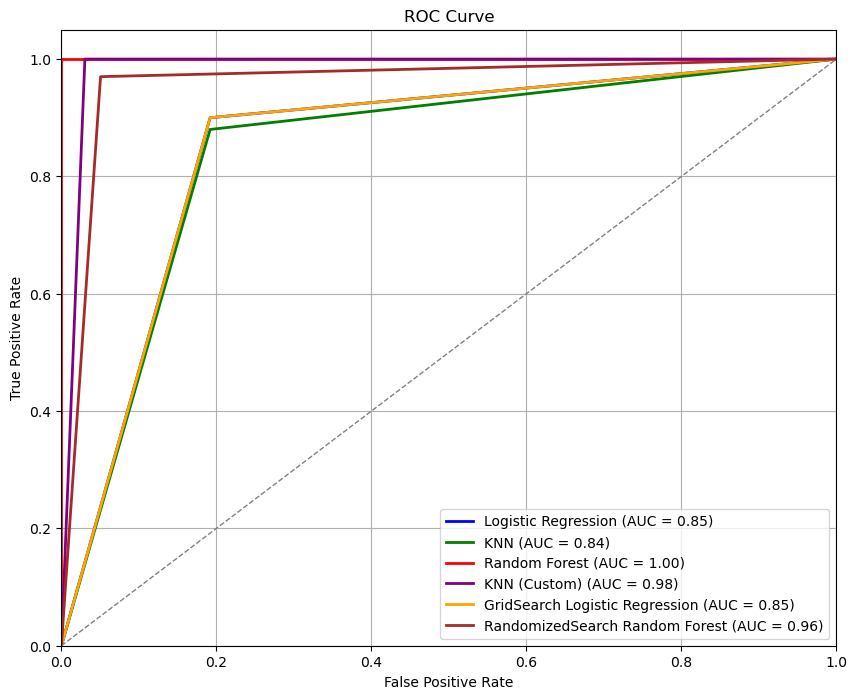

In [47]:
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for each model
fpr1, tpr1, _ = roc_curve(Y_test, y_pred1, drop_intermediate=False)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(Y_test, y_pred2, drop_intermediate=False)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(Y_test, y_pred3, drop_intermediate=False)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(Y_test, y_pred4, drop_intermediate=False)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(Y_test, y_pred5, drop_intermediate=False)
roc_auc5 = auc(fpr5, tpr5)

fpr6, tpr6, _ = roc_curve(Y_test, y_pred6, drop_intermediate=False)
roc_auc6 = auc(fpr6, tpr6)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'KNN (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, color='purple', lw=2, label=f'KNN (Custom) (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, color='orange', lw=2, label=f'GridSearch Logistic Regression (AUC = {roc_auc5:.2f})')
plt.plot(fpr6, tpr6, color='brown', lw=2, label=f'RandomizedSearch Random Forest (AUC = {roc_auc6:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<Axes: >

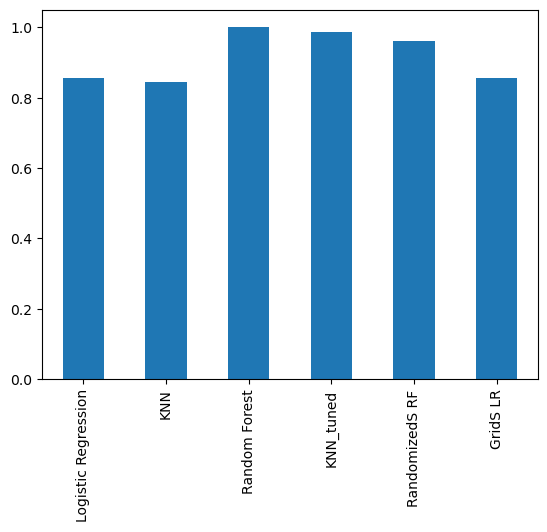

In [48]:
# Conclusion
model_scores.update( [('KNN_tuned',max(test_scores)),('RandomizedS RF',rs_rf_score),('GridS LR',gs_lr_score)])
model_compare2 = pd.DataFrame(model_scores, index=["accuracy"])
model_compare2.T.plot.bar(legend=False)

In [49]:
#Saving all models

from joblib import dump
dump(models['Logistic Regression'], 'C:/Users/dell/Documents/SID/semester 4/ML Project/Models/Logistic Regression.joblib')
dump(models['KNN'], 'C:/Users/dell/Documents/SID/semester 4/ML Project/Models/KNN.joblib')
dump(models['Random Forest'], 'C:/Users/dell/Documents/SID/semester 4/ML Project/Models/Random Forest.joblib')
dump(knn, 'C:/Users/dell/Documents/SID/semester 4/ML Project/Models/Tuned KNN.joblib')
dump(gs_log_reg, 'C:/Users/dell/Documents/SID/semester 4/ML Project/Models/Grid Search Logistic Regression.joblib')
dump(rs_rf, 'C:/Users/dell/Documents/SID/semester 4/ML Project/Models/Random Search Random Forest.joblib')


['C:/Users/dell/Documents/SID/semester 4/ML Project/Models/Random Search Random Forest.joblib']

In [50]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train,Y_train);

In [51]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

<Axes: title={'center': 'Feature Importance(Based on LR Coefficients)'}>

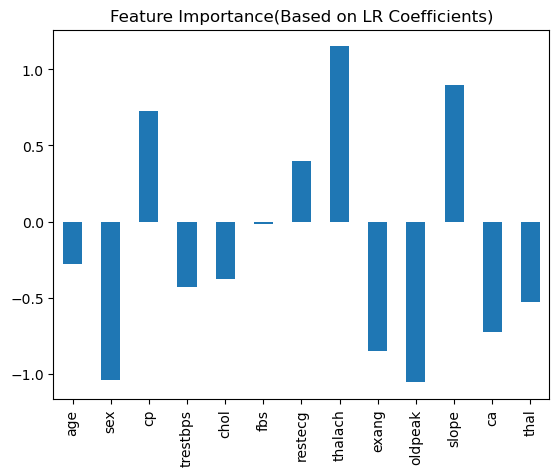

In [53]:
#Visualise feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance(Based on LR Coefficients)",legend=False)